In [1]:
import sys
from pathlib import Path

sys.path.insert(0, "/share/home/ychi/dev/sperm_struct/notebooks")

import h2 as h
import pandas as pd
import plotly.express as px
from lib.plot import plot_figure, plot_pileups, plot_figure_canvas

lr_contour = pd.read_pickle(Path("../Fig1_contour/") / f"Sperm.lr_contour.v{h.version}.pkl")
dv_contour = pd.read_pickle(Path("../Fig1_contour/") / f"Sperm.dv_contour.v{h.version}.pkl")
hg_lr_contour = pd.read_pickle(Path("../Fig1_contour/") / f"Sperm_hg.lr_contour.v{h.version}.pkl")
hg_dv_contour = pd.read_pickle(Path("../Fig1_contour/") / f"Sperm_hg.dv_contour.v{h.version}.pkl")

In [2]:
batches = [
    "Sperm",
    "Sperm_hg",
    "Sperm_scAB",
    "Sperm_hg_scAB"
]

arg_bfs_vx_files = {
    batch : (h.ddir / batch).with_suffix(".vx.bfs.h5")
    for batch in batches
}

In [39]:
import re
def chunk_sum(chunk, cols):
    return chunk.loc[:, cols].sum(axis=1)
def bulkAB_feature_agg(bfs_file, AB="A", chunksize=50000, report=False):
    assert AB in ["A","B"]
    with pd.HDFStore(bfs_file,"r") as store:
        chunk_sum_list = []
        for chunk in store.select(
                "main",
                where = 'lr == 0',
                #columns = ["ht","dv","sample_name"] + col_list,
                iterator=True,
                chunksize=chunksize
                ):
            chunk = chunk.set_index(["ht","dv"])
            if AB == "A":
                col_list = [col for col in chunk.columns if re.match("chr\d+_An\d+",col)]
            elif AB == "B":
                col_list = [col for col in chunk.columns if re.match("chr\d+_Bn\d+",col)]
            else:
                raise ValueError("AB must in [A,B]")
            chunk_sum_res = chunk_sum(
                chunk, col_list
                ).rename("count").reset_index(["ht","dv"])
            chunk_sum_list.append(
                chunk_sum_res
            )
            if report:
                print("add",chunk_sum_res["count"].sum().sum())
    dist = pd.concat(
        chunk_sum_list,axis=0
        ).groupby(["ht","dv"])["count"].mean()
    return dist

### plot mouse bulkAB annotations

sample 1 bin for each block

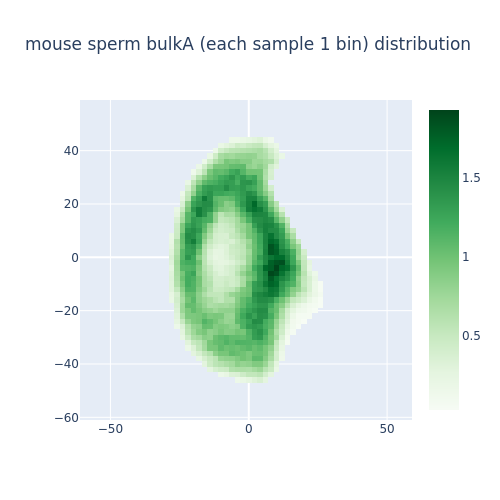

In [ ]:
data = bulkAB_feature_agg(
    arg_bfs_vx_files["Sperm_scAB"],
    "A"
    )
data.loc[~lr_contour.astype("bool")] = pd.NA
data = data.unstack()
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Greens,
    )
fig.update_layout(
    title = "mouse sperm bulkA <br> (each AB block sample 1 bin) distribution"
)
fig.show(renderer="png")

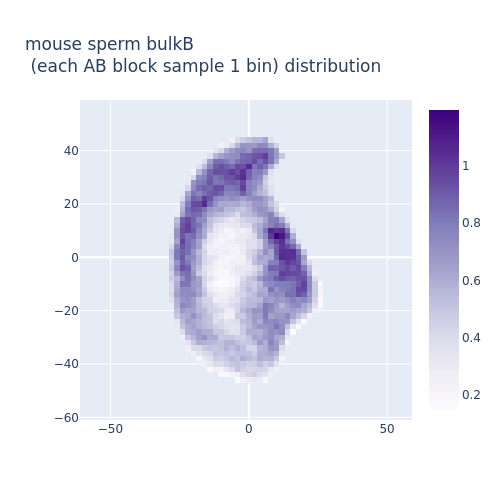

In [43]:
data = bulkAB_feature_agg(
    arg_bfs_vx_files["Sperm_scAB"],
    "B"
    )
data.loc[~lr_contour.astype("bool")] = pd.NA
data = data.unstack()
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Purples,
    )
fig.update_layout(
    title = "mouse sperm bulkB <br> (each AB block sample 1 bin) distribution"
)
fig.show(renderer="png")

total block

In [17]:
batch = "Sperm"

with pd.HDFStore(arg_bfs_vx_files[batch],"r") as store:
    bfs = store.select(
        "main",
        where='lr==0',
        columns=["ht","dv","sample_name","bulkA_dist","bulkB_dist"],
        )

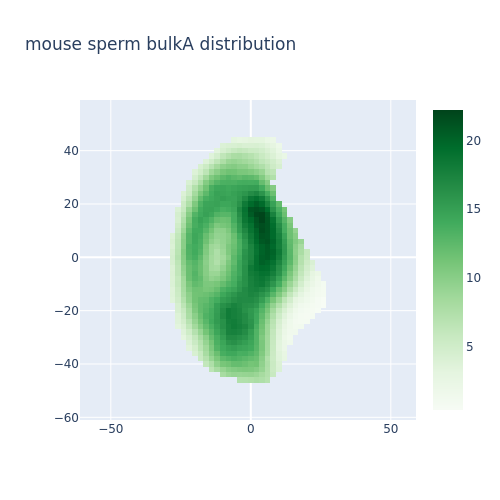

In [21]:
data = bfs.groupby(["ht","dv"])["bulkA_dist"].mean()
data.loc[~lr_contour.astype("bool")] = pd.NA
data = data.unstack()
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Greens,
    )
fig.update_layout(
    title = "mouse sperm bulkA distribution"
)
fig.show(renderer="png")

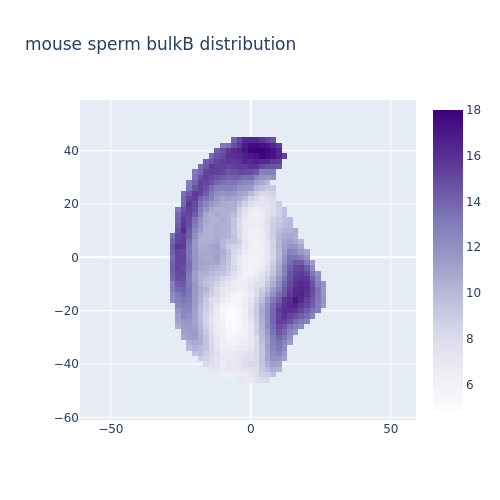

In [22]:
data = bfs.groupby(["ht","dv"])["bulkB_dist"].mean()
data.loc[~lr_contour.astype("bool")] = pd.NA
data = data.unstack()
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Purples,
    )
fig.update_layout(
    title = "mouse sperm bulkB distribution"
)
fig.show(renderer="png")

### plot human bulkAB annotations

sample 1 bin for each block

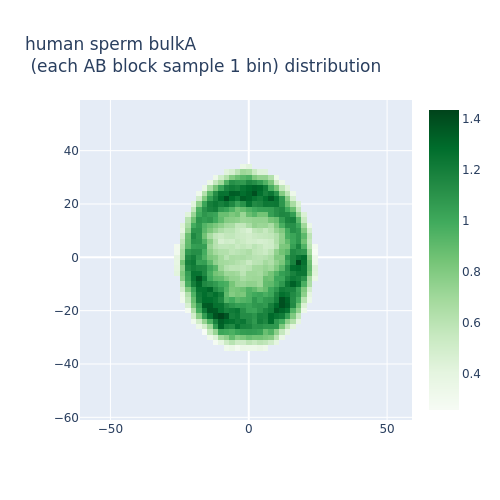

In [46]:
data = bulkAB_feature_agg(
    arg_bfs_vx_files["Sperm_hg_scAB"],
    "A"
    )
data.loc[~hg_lr_contour.astype("bool")] = pd.NA
data = data.unstack()
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Greens,
    )
fig.update_layout(
    title = "human sperm bulkA <br> (each AB block sample 1 bin) distribution"
)
fig.show(renderer="png")

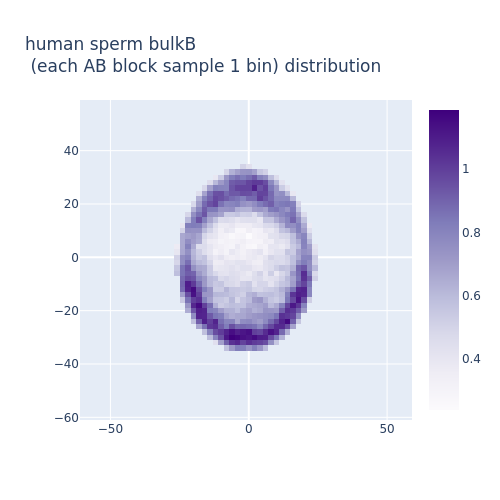

In [47]:
data = bulkAB_feature_agg(
    arg_bfs_vx_files["Sperm_hg_scAB"],
    "B"
    )
data.loc[~hg_lr_contour.astype("bool")] = pd.NA
data = data.unstack()
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Purples,
    )
fig.update_layout(
    title = "human sperm bulkB <br> (each AB block sample 1 bin) distribution"
)
fig.show(renderer="png")

total block

In [23]:
batch = "Sperm_hg"

with pd.HDFStore(arg_bfs_vx_files[batch],"r") as store:
    bfs = store.select(
        "main",
        where='lr==0',
        columns=["ht","dv","sample_name","bulkA_dist","bulkB_dist"],
        )

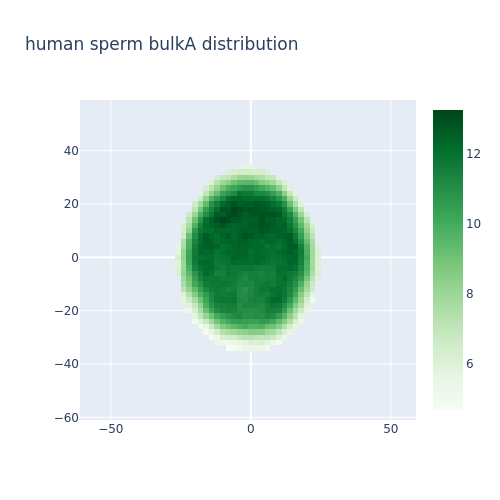

In [25]:
data = bfs.groupby(["ht","dv"])["bulkA_dist"].mean()
data.loc[~hg_lr_contour.astype("bool")] = pd.NA
data = data.unstack()
# fig = plot_figure(
#     data,
#     cmap = px.colors.diverging.PRGn,
#     zmin = 0.005,
#     zmax = 0.015
# )
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Greens,
    #zmin = 0.005,
    #zmax = 0.015
    )
fig.update_layout(
    title = "human sperm bulkA distribution"
)
fig.show(renderer="png")

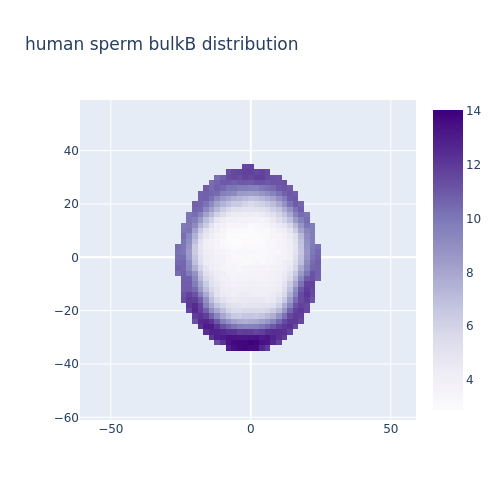

In [26]:
data = bfs.groupby(["ht","dv"])["bulkB_dist"].mean()
data.loc[~hg_lr_contour.astype("bool")] = pd.NA
data = data.unstack()
# fig = plot_figure(
#     data,
#     cmap = px.colors.diverging.PRGn,
#     zmin = 0.005,
#     zmax = 0.015
# )
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.sequential.Purples,
    #zmin = 0.005,
    #zmax = 0.015
    )
fig.update_layout(
    title = "human sperm bulkB distribution"
)
fig.show(renderer="png")

dv view

In [7]:
batch = "Sperm_hg"

with pd.HDFStore(arg_bfs_vx_files[batch],"r") as store:
    bfs = store.select(
        "main",
        where='dv==0',
        columns=["ht","lr","sample_name","scAB_dist"],
        )
data = bfs.groupby(["ht","lr"])["scAB_dist"].mean()
data.loc[~hg_dv_contour.astype("bool")] = pd.NA

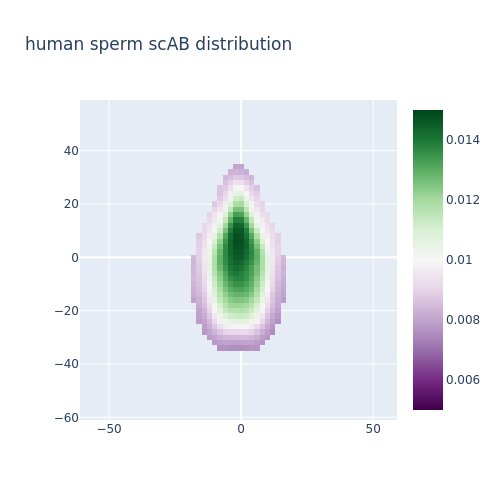

In [9]:
data = data.unstack()
# fig = plot_figure(
#     data,
#     cmap = px.colors.diverging.PRGn,
#     zmin = 0.005,
#     zmax = 0.015
# )
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.diverging.PRGn,
    zmin = 0.005,
    zmax = 0.015
    )
fig.update_layout(
    title = "human sperm scAB distribution"
)
fig.show(renderer="png")

### plot human CpG (with h5)

In [3]:
batch = "Sperm_hg"

with pd.HDFStore(arg_bfs_vx_files[batch],"r") as store:
    bfs = store.select(
        "main",
        where='lr==0',
        columns=["ht","dv","sample_name","mean_CpG"],
        )
data = bfs.groupby(["ht","dv"])["mean_CpG"].mean()
data.loc[~hg_lr_contour.astype("bool")] = pd.NA

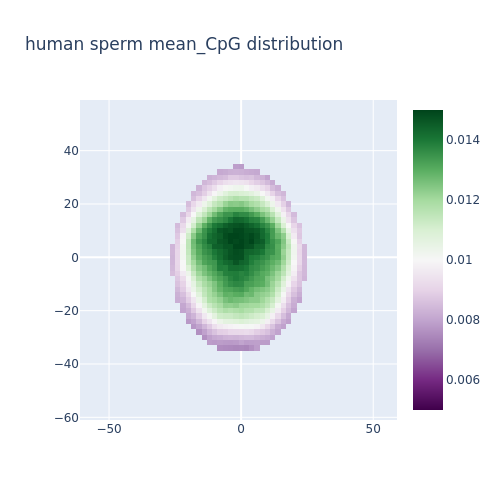

In [4]:
data = data.unstack()
# fig = plot_figure(
#     data,
#     cmap = px.colors.diverging.PRGn,
#     zmin = 0.005,
#     zmax = 0.015
# )
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.diverging.PRGn,
    zmin = 0.005,
    zmax = 0.015
    )
fig.update_layout(
    title = "human sperm mean_CpG distribution"
)
fig.show(renderer="png")

In [11]:
batch = "Sperm_hg"

bfs = []
with pd.HDFStore(arg_bfs_vx_files[batch],"r") as store:
    for chunk in store.select(
        "main",
        where='lr>==0',
        columns=["ht","dv","sample_name","scAB_dist"],
        iterator=True,
        chunksize=1000000
        ):
        bfs.append(
            chunk.groupby(["ht","dv"])["scAB_dist"].sum()
        )
        print(len(bfs))

KeyboardInterrupt: 

In [ ]:

slice_bfs = pd.read_pickle(arg_bfs_vx_files[batch])
data = slice_bfs["mean_CpG"].mean(axis=1).copy()
data.loc[~hg_lr_contour.astype("bool")] = pd.NA
data = data.unstack()
# fig = plot_figure(
#     data,
#     cmap = px.colors.diverging.PRGn,
#     zmin = 0.005,
#     zmax = 0.015
# )
fig = plot_figure_canvas(
    data,
    square_size=60,
    step=2,
    fill=pd.NA,
    cmap = px.colors.diverging.PRGn,
    zmin = 0.005,
    zmax = 0.015
    )
fig.update_layout(
    title = "human sperm CpG distribution"
)
fig.show(renderer="png")